In [ ]:
# по сути это калькулятор
import numpy as np

# Функция сигмоида. Необходима для опредления значения весов
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [ ]:
np.zeros((2**3,3)) # просто тренировка

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [3]:

# Смысл в том,что
#  входные нейроны - это количество единичек. Происходит просто подсчет входных единичек
# а выходные  - это цифры 0, 1, 2, 3, ....


n = 3 # столбцов - число входных нейронов
h = 8 #- количество комплектов данных для обучения



#training_inputs = np.zeros((2**n, n), dtype=float) # заполняем нулями h комплектов (строк) для обучения по n входных нейронов  . матрица h строк, n столбцов

# 4 комплекта по 2 входных нейрона
training_inputs = ([[0., 0.],
                    [0., 1.],
                    [1., 0.],
                    [1., 1.]])




print ('training_inputs')
print (training_inputs)
print("")

training_inputs
[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]



In [8]:
#training_outputs. N+1 выходной нейрон, тк еще 0. Это правильные ответы на выходных нейронах. 1й нейрон это 0. 2й - 1 и т.д.
# 0, 1, 2, 3, ...




#же 4 комплекта по 3 выходных нейрона: 0, 1, 2

training_outputs = ([[1., 0., 0.],
                    [0., 1., 0.],
                    [0., 1., 0.],
                    [0., 0., 1.]])


print(training_outputs)


[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]


[[0. 1. 2.]
 [1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]]


In [ ]:

# Сделаем случайные числа более определёнными
#np.random.seed(1)

# Инициализируем веса случайным образом со средним 0
#synaptic_weights = 2 * np.random.random((3, 3)) - 1

n=2
# Инициализируем син. веса единицами
synaptic_weights = np.ones((n, n+1)) #  матрица n на n+1. 2 на 3: 2 входных, 3 выходных

print("инициализированные веса synaptic_weights")
print(np.round(synaptic_weights, 2))
print("")


инициализированные веса synaptic_weights
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]



In [ ]:

# метод обратного распространения
for i in range(1):                    # количество эпох
        input_layer = training_inputs
        print("На выходе, до сигмоида np.dot(input_layer, synaptic_weights")
        print(np.dot(input_layer, synaptic_weights))
        print("")
  
        outputs  = sigmoid (np.dot(input_layer, synaptic_weights))  # это столбик 5 на 1. Умножаем матрицу на столбик, получаем столбик.
        print("На выходе, после сигмоида (outputs)")
        print(np.round(outputs,2))
        print("")
        
        err = training_outputs - outputs # err - это матрица 5 на 3
        print("err")
        print(np.round(err,2))
        print("")
        #adjustments = np.dot(input_layer.T, err * (outputs * (1-outputs)) ) # Тут не понятно как это работает
        
        delta = err * outputs * (1-outputs)
        # =err * f '   .   по теории outputs - д.б. f, т.е. сигмоид, в точке входной суммы последнег7о нейрона.
        # Но, f(v_out ) - это выходн знач последнего нейрона
        # training_inputs - входные веса (матрица) умножаем на столбик дельты, получим столбик
        print("input_layer")
        print(np.round(input_layer,2))
        print("")
        print("input_layer.T")
        print(np.round(input_layer.T,2))
        print("")
        print("delta") # тут все ок
        print(np.round(delta, 2))
        print("")
        
        adjustments = np.dot(input_layer.T, delta) #  тут уже странно
        print("adjustments. Корректировки весов, столбик - № нейрона выходного. Строка - входного")
        print(np.round(adjustments,2))
        print("")
        
        synaptic_weights += adjustments # synaptic_weights это столбик, значит adjustments   тоже столбик 
        print("synaptic_weights После корректировки (обучения)")
        print(np.round(synaptic_weights,2))
        print("")




print("Веса после всех циклов (эпох) обучений synaptic_weights")
print(np.round(synaptic_weights,2))
print("")


 #Тест. Проверка
new_inputs = np.array([1, 1, 0])
output = sigmoid(np.dot (new_inputs, synaptic_weights))
print("Новая ситуация")
print(new_inputs)
print("0 1 2")
print(np.round(output,2))

На выходе, до сигмоида np.dot(input_layer, synaptic_weights
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]]

На выходе, после сигмоида (outputs)
[[0.5  0.5  0.5  0.5 ]
 [0.73 0.73 0.73 0.73]
 [0.73 0.73 0.73 0.73]
 [0.88 0.88 0.88 0.88]
 [0.73 0.73 0.73 0.73]
 [0.88 0.88 0.88 0.88]
 [0.88 0.88 0.88 0.88]
 [0.95 0.95 0.95 0.95]]

err
[[ 0.5  -0.5  -0.5  -0.5 ]
 [-0.73  0.27 -0.73 -0.73]
 [-0.73  0.27 -0.73 -0.73]
 [-0.88 -0.88  0.12 -0.88]
 [-0.73  0.27 -0.73 -0.73]
 [-0.88 -0.88  0.12 -0.88]
 [-0.88 -0.88  0.12 -0.88]
 [-0.95 -0.95 -0.95  0.05]]

input_layer
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]

input_layer.T
[[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]

delta
[[ 0.12 -0.12 -0.12 -0.12]
 [-0.14  0.05 -0.14 -0.14]
 [-0.14  0.05 -0.14 -0.14]
 [-0.09 -0.09  0.01 -0.09]
 [-0.14  0.05 -0.14 -0.14]
 [-0.09 -0.09  0.01 -0.09]

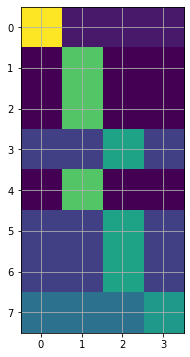

In [ ]:
import matplotlib.pyplot as plt

h = 8 #- количество комплектов данных

x, y = np.mgrid[0:h,
                0:(n+1)]

#x - число столбцов
#y - число строк

z = delta[x,y]

fig, ax = plt.subplots()

ax.imshow(z)
fig.set_figwidth(6)      #  ширина и
fig.set_figheight(6)     #  высота "Figure"
#plt.style.context('dark_background')
#plt.colorbar(6)
plt.grid()
plt.show()
#plt.style.use('classic')




In [ ]:
int(2.1)


2